## Instalacja pakietów

In [1]:
%pip install numpy
%pip install pandas
%pip install tqdm
%pip install nltk
%pip install scikit-learn
%pip install matplotlib
%pip install plotly
%pip install seaborn
%pip install pydot
%pip install graphviz

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import re

import matplotlib.pyplot as plt

2023-06-24 17:17:29.626624: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-24 17:17:30.377614: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
nltk.download("stopwords")
%matplotlib inline
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
pd.options.plotting.backend = "plotly"

Num GPUs Available:  1


[nltk_data] Downloading package stopwords to /home/szymon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2023-06-24 17:17:31.195342: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-24 17:17:31.238849: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-24 17:17:31.238926: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [4]:
df0 = pd.read_csv("trumptweets.csv")
df = df0[['content', 'retweets', 'favorites']].copy()
df

,content,retweets,favorites
0,Be sure to tune in and watch Donald Trump on L...,500,868
1,Donald Trump will be appearing on The View tom...,33,273
2,Donald Trump reads Top Ten Financial Tips on L...,12,18
3,New Blog Post: Celebrity Apprentice Finale and...,11,24
4,"""My persona will never be that of a wallflower...",1399,1965
...,...,...,...
41117,I have never seen the Republican Party as Stro...,32620,213817
41118,Now Mini Mike Bloomberg is critical of Jack Wi...,36239,149571
41119,I was thrilled to be back in the Great State o...,16588,66944
41120,"“In the House, the President got less due proc...",20599,81921


In [5]:
def tweet_to_words(tweet):
    ''' Convert tweet text into a sequence of words '''
    
    # convert to lowercase
    text = tweet.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

In [6]:
cleantext=[]
for item in tqdm(df['content']):
    words=tweet_to_words(item)
    cleantext+=[words]
df['cleantext']=cleantext
df

100%|██████████| 41122/41122 [00:49<00:00, 828.75it/s] 


,content,retweets,favorites,cleantext
0,Be sure to tune in and watch Donald Trump on L...,500,868,"[sure, tune, watch, donald, trump, late, night..."
1,Donald Trump will be appearing on The View tom...,33,273,"[donald, trump, appear, view, tomorrow, morn, ..."
2,Donald Trump reads Top Ten Financial Tips on L...,12,18,"[donald, trump, read, top, ten, financi, tip, ..."
3,New Blog Post: Celebrity Apprentice Finale and...,11,24,"[new, blog, post, celebr, apprentic, final, le..."
4,"""My persona will never be that of a wallflower...",1399,1965,"[persona, never, wallflow, rather, build, wall..."
...,...,...,...,...
41117,I have never seen the Republican Party as Stro...,32620,213817,"[never, seen, republican, parti, strong, unifi..."
41118,Now Mini Mike Bloomberg is critical of Jack Wi...,36239,149571,"[mini, mike, bloomberg, critic, jack, wilson, ..."
41119,I was thrilled to be back in the Great State o...,16588,66944,"[thrill, back, great, state, texa, tonight, pe..."
41120,"“In the House, the President got less due proc...",20599,81921,"[hous, presid, got, less, due, process, 9, 11,..."


In [7]:
def compute_vader_scores(df, label):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = df[label].apply(lambda x: sid.polarity_scores(' '.join(x)))
    df["vader_neg"] = polarity_scores.apply(lambda x: x["neg"])
    df["vader_neu"] = polarity_scores.apply(lambda x: x["neu"])
    df["vader_pos"] = polarity_scores.apply(lambda x: x["pos"])
    df["vader_comp"] = polarity_scores.apply(lambda x: x["compound"])
    df['cleantext2'] = df[label].apply(lambda x: ' '.join(x))
    return df

In [8]:
df2 = compute_vader_scores(df,'cleantext')
df2

,content,retweets,favorites,cleantext,vader_neg,vader_neu,vader_pos,vader_comp,cleantext2
0,Be sure to tune in and watch Donald Trump on L...,500,868,"[sure, tune, watch, donald, trump, late, night...",0.000,0.745,0.255,0.4767,sure tune watch donald trump late night david ...
1,Donald Trump will be appearing on The View tom...,33,273,"[donald, trump, appear, view, tomorrow, morn, ...",0.000,0.652,0.348,0.7506,donald trump appear view tomorrow morn discuss...
2,Donald Trump reads Top Ten Financial Tips on L...,12,18,"[donald, trump, read, top, ten, financi, tip, ...",0.000,0.893,0.107,0.2023,donald trump read top ten financi tip late sho...
3,New Blog Post: Celebrity Apprentice Finale and...,11,24,"[new, blog, post, celebr, apprentic, final, le...",0.000,1.000,0.000,0.0000,new blog post celebr apprentic final lesson le...
4,"""My persona will never be that of a wallflower...",1399,1965,"[persona, never, wallflow, rather, build, wall...",0.000,1.000,0.000,0.0000,persona never wallflow rather build wall cling...
...,...,...,...,...,...,...,...,...,...
41117,I have never seen the Republican Party as Stro...,32620,213817,"[never, seen, republican, parti, strong, unifi...",0.000,0.508,0.492,0.7003,never seen republican parti strong unifi right...
41118,Now Mini Mike Bloomberg is critical of Jack Wi...,36239,149571,"[mini, mike, bloomberg, critic, jack, wilson, ...",0.324,0.526,0.150,-0.7650,mini mike bloomberg critic jack wilson save pe...
41119,I was thrilled to be back in the Great State o...,16588,66944,"[thrill, back, great, state, texa, tonight, pe...",0.041,0.541,0.419,0.9325,thrill back great state texa tonight peopl kno...
41120,"“In the House, the President got less due proc...",20599,81921,"[hous, presid, got, less, due, process, 9, 11,...",0.227,0.773,0.000,-0.6908,hous presid got less due process 9 11 terroris...


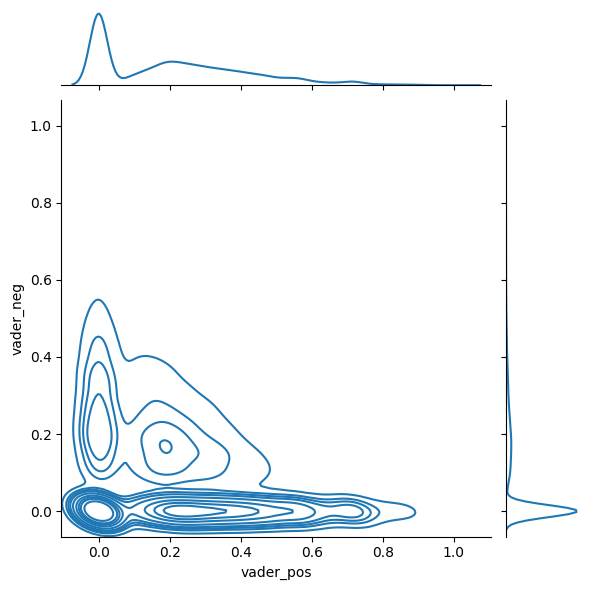

In [9]:
sns.jointplot(data=df2, x='vader_pos', y='vader_neg', kind="kde");

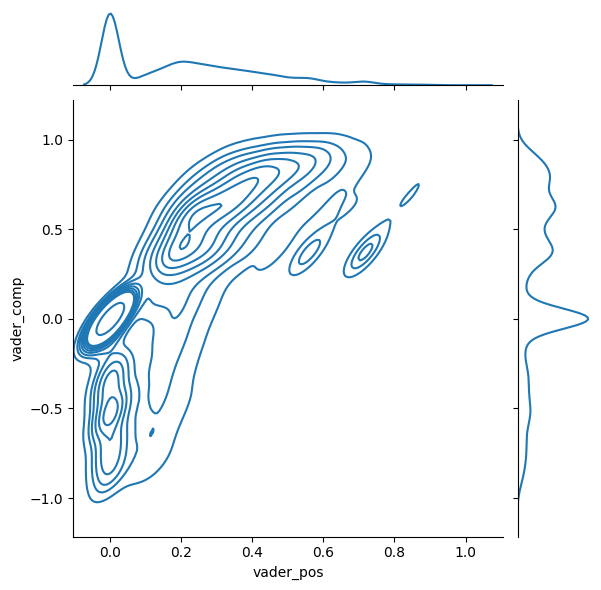

In [10]:
sns.jointplot(data=df2, x='vader_pos', y='vader_comp', kind="kde");

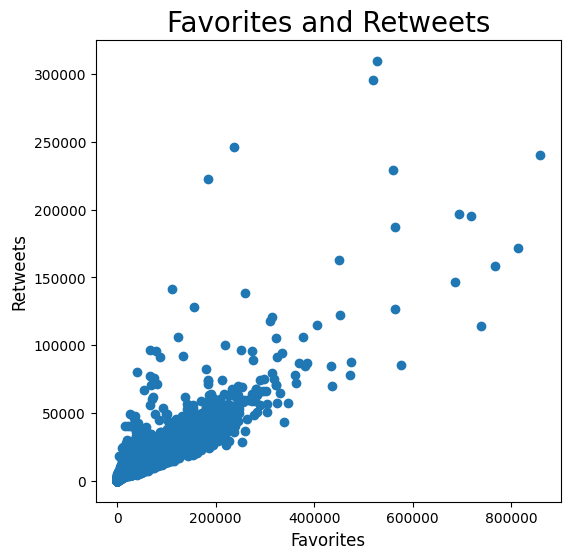

In [11]:
fig,ax = plt.subplots(figsize=(6,6))
ax.set_title('Favorites and Retweets',fontsize=20)
ax.set_xlabel('Favorites',fontsize=12)
ax.set_ylabel('Retweets',fontsize=12)
ax.scatter(df2.favorites,df2.retweets);

In [12]:
class0=[]
for i in range(len(df2)):
    if df2.loc[i,'vader_pos']>0.1:
        class0+=[2]
    elif df2.loc[i,'vader_neg']>0.1:
        class0+=[0]        
    else:
        class0+=[1]

In [13]:
df['class']=class0
df['class'].value_counts()

class
2    25690
1     9623
0     5809
Name: count, dtype: int64

In [14]:
MAX_WORDS = 5000
MAX_LENGTH =50

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=MAX_WORDS, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    X = tokenizer.texts_to_sequences(text)
    X = pad_sequences(X, padding='post', maxlen=MAX_LENGTH)
    return X, tokenizer

In [15]:
print('Before Tokenization & Padding \n', df['cleantext2'][0])
X, tokenizer = tokenize_pad_sequences(df['cleantext2'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 sure tune watch donald trump late night david letterman present top ten list tonight
After Tokenization & Padding 
 [ 309  493   45   12    4  592   96  599  994  983  269 1486  731   85
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [16]:
print(X.shape)

(41122, 50)


In [17]:
y = pd.get_dummies(df['class'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

print('Train Set: ', X_train.shape, y_train.shape)
print('Validation Set: ', X_val.shape, y_val.shape)
print('Test Set: ', X_test.shape, y_test.shape)

Train Set:  (24672, 50) (24672, 3)
Validation Set:  (8225, 50) (8225, 3)
Test Set:  (8225, 50) (8225, 3)


In [18]:
import tensorflow.keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

## Model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import datasets
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import History
from tensorflow.keras import losses

In [20]:
vocab_size = 5000
embedding_size = 32
epochs = 10
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

In [21]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=learning_rate,
    decay_steps=10000,
    decay_rate=0.9
)

In [22]:
sgd = SGD(learning_rate=lr_schedule, momentum=momentum, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=MAX_LENGTH))
model.add(Conv1D(filters=32, kernel_size=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

2023-06-24 17:19:05.954636: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-24 17:19:05.954903: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-24 17:19:05.954965: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-24 17:19:06.592901: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-24 17:19:06.592986: I tensorflow/compile

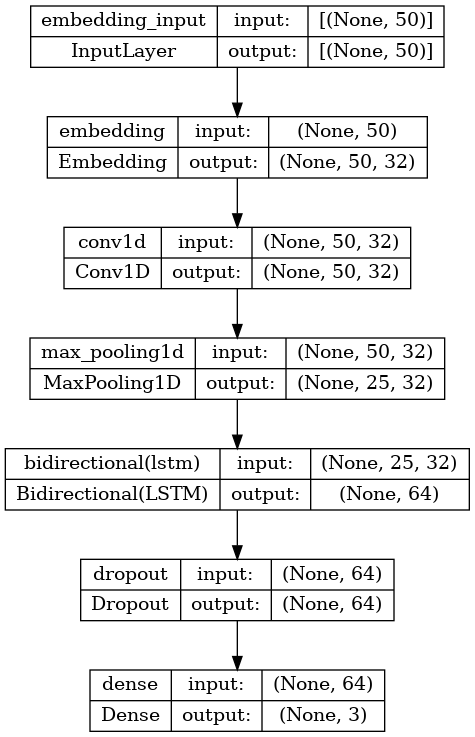

In [24]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [25]:
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy', Precision(), Recall()])

In [26]:
history = model.fit(X_train,y_train,validation_data=(X_val, y_val),batch_size=64,epochs=epochs,verbose=1)

Epoch 1/10


2023-06-24 17:20:57.684589: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-24 17:20:57.687148: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-24 17:20:57.688856: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

386/386 [==============================] - ETA: 0s - loss: 0.7692 - accuracy: 0.6791 - precision: 0.7028 - recall: 0.6315

2023-06-24 17:21:18.766975: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-24 17:21:18.769127: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-24 17:21:18.770638: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

386/386 [==============================] - 23s 37ms/step - loss: 0.7692 - accuracy: 0.6791 - precision: 0.7028 - recall: 0.6315 - val_loss: 0.3810 - val_accuracy: 0.8409 - val_precision: 0.9011 - val_recall: 0.7805
Epoch 2/10
386/386 [==============================] - 8s 20ms/step - loss: 0.3442 - accuracy: 0.8631 - precision: 0.8841 - recall: 0.8394 - val_loss: 0.2665 - val_accuracy: 0.9044 - val_precision: 0.9129 - val_recall: 0.8974
Epoch 3/10
386/386 [==============================] - 7s 19ms/step - loss: 0.2155 - accuracy: 0.9332 - precision: 0.9381 - recall: 0.9283 - val_loss: 0.1900 - val_accuracy: 0.9443 - val_precision: 0.9465 - val_recall: 0.9407
Epoch 4/10
386/386 [==============================] - 7s 17ms/step - loss: 0.1506 - accuracy: 0.9563 - precision: 0.9597 - recall: 0.9532 - val_loss: 0.1592 - val_accuracy: 0.9523 - val_precision: 0.9552 - val_recall: 0.9493
Epoch 5/10
386/386 [==============================] - 7s 17ms/step - loss: 0.1246 - accuracy: 0.9622 - precisi

## Evaluation

In [27]:
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)

print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))

Accuracy  : 0.9533
Precision : 0.9547
Recall    : 0.9526
F1 Score  : 0.9536


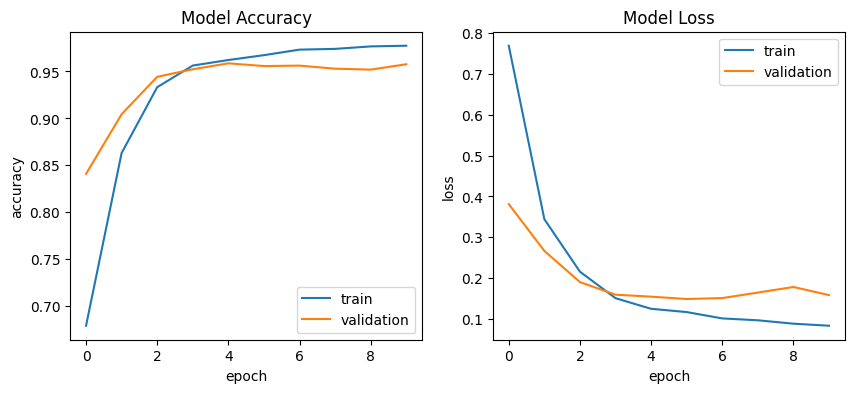

In [28]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1,2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

2023-06-24 17:25:06.527097: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-24 17:25:06.528942: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-24 17:25:06.530043: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

 10/258 [>.............................] - ETA: 1s  

2023-06-24 17:25:06.737845: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-24 17:25:06.740004: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-24 17:25:06.741580: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

258/258 [==============================] - 2s 5ms/step
2    5054
1    1978
0    1193
Name: count, dtype: int64
2    5137
1    1948
0    1140
Name: count, dtype: int64


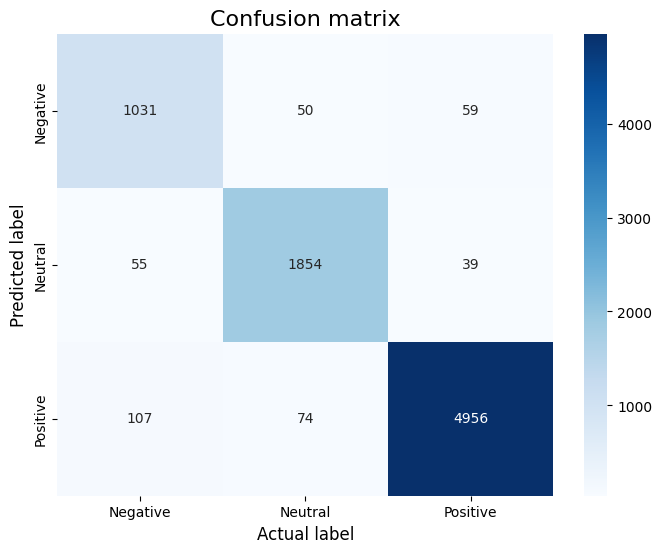

In [29]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Negative','Neutral', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(y_pred, axis=1),np.argmax(np.array(y_test),axis=1))
    
    print(pd.Series(np.argmax(np.array(y_test),axis=1)).value_counts())
    print(pd.Series(np.argmax(y_pred, axis=1)).value_counts())
    
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_test, y_test)

In [31]:
import pickle

pickle.dump(model, open('TrumpTweestModel.model', 'wb'))